# E04: Stochastic systems with lagged dependencies

In [14]:
import os, sys
sys.path.append(os.path.abspath('../utils'))
import numpy as np
import matplotlib.pyplot as plt
import surd as surd

# Configure matplotlib to use LaTeX for text rendering and set font size
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 20})

## Case 1: linear system

### System definition

In [15]:
def ding(N):
    # Initialize arrays for the state variables with zeros
    q1 = np.zeros(N)
    q2 = np.zeros(N)
    
    # Initialize arrays for the noise terms with random normal values
    eta1 = np.random.normal(0, 1, N)
    eta2 = np.random.normal(0, 1, N)
    
    # Simulate the system over N time steps
    for t in range(1, N-1):
        q1[t+1] = 0.95 * np.sqrt(2) * q1[t] - 0.9025 * q1[t-1] + eta1[t]
        q2[t+1] = 0.5 * q1[t-1] + eta2[t]
    return q1, q2

### Problem set-up

In [16]:
N = 10**7
samples = N-10000

q1, q2 = ding(N)
X = np.array([q1[-samples:], q2[-samples:]])

nbins = 50
nlag = 2
nvars = X.shape[0]
max_combs = 4

### Causality analysis

SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (1, 4)      : 0.1688
        (2, 3)      : 0.0000
        (2, 4)      : 0.0000
        (3, 4)      : 0.0000
        (1, 2, 3)   : 0.0000
        (1, 2, 4)   : 0.1204
        (1, 3, 4)   : 0.0000
        (2, 3, 4)   : 0.0000
        (1, 2, 3, 4): 0.0010
    Unique (U):
        (1,)        : 0.0134
        (2,)        : 0.0000
        (3,)        : 0.0000
        (4,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.1658
        (1, 3)      : 0.3542
        (1, 4)      : 0.1607
        (2, 3)      : 0.0000
        (2, 4)      : 0.0090
        (3, 4)      : 0.0001
        (1, 2, 3)   : 0.0059
        (1, 2, 4)   : 0.0001
        (1, 3, 4)   : 0.0005
        (2, 3, 4)   : 0.0000
    Information Leak: 61.62%


SURD CAUSALITY FOR SIGNAL 2
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.1085
        (1, 4)      : 0.0000
        (2, 3)      : 0.00

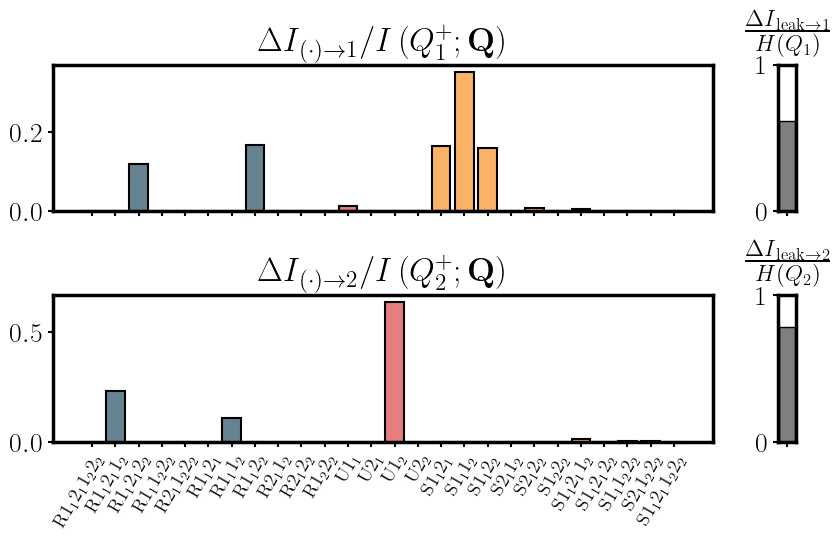

In [17]:
fig, axs = plt.subplots(nvars, 2, figsize=(10, 2.8*nvars), gridspec_kw={'width_ratios': [55, 1]})
I_R, I_S, MI, info_leak = surd.run_multiple_lags(X, nvars, nlag, nbins, max_combs, axs)

plt.tight_layout(w_pad=-4, h_pad=0.5)
plt.show()

## Case 2: non-linear system

### System definition

In [18]:
def bueso(N):
    # Initialize arrays for the state variables with zeros
    q1 = np.zeros(N)
    q2 = np.zeros(N)
    
    # Initialize arrays for the noise terms with random normal values
    eta1 = np.random.normal(0, np.sqrt(0.4), N)
    eta2 = np.random.normal(0, np.sqrt(0.4), N)
    
    # Simulate the system over N time steps
    for t in range(1, N-1):
        q1[t+1] = 3.4 * q1[t] * (1 - q1[t]**2) * np.exp(-q1[t-1]**2) + eta1[t]
        q2[t+1] = 3.4 * q2[t] * (1 - q2[t]**2) * np.exp(-q2[t]**2) + q1[t-1] * q2[t] / 2 + eta2[t]
    return q1, q2

### Problem set-up

In [22]:
N = 5*10**7
samples = N-10000

q1, q2 = bueso(N)
X = np.array([q1[-samples:], q2[-samples:]])

nbins = 50
nlag = 2
nvars = X.shape[0]
max_combs = 4

### Causality analysis

SURD CAUSALITY FOR SIGNAL 1
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.0000
        (1, 4)      : 0.1678
        (2, 3)      : 0.0000
        (2, 4)      : 0.0000
        (3, 4)      : 0.0000
        (1, 2, 3)   : 0.0000
        (1, 2, 4)   : 0.1198
        (1, 3, 4)   : 0.0000
        (2, 3, 4)   : 0.0000
        (1, 2, 3, 4): 0.0010
    Unique (U):
        (1,)        : 0.0134
        (2,)        : 0.0000
        (3,)        : 0.0000
        (4,)        : 0.0000
    Synergystic (S):
        (1, 2)      : 0.1654
        (1, 3)      : 0.3562
        (1, 4)      : 0.1598
        (2, 3)      : 0.0000
        (2, 4)      : 0.0090
        (3, 4)      : 0.0001
        (1, 2, 3)   : 0.0066
        (1, 2, 4)   : 0.0001
        (1, 3, 4)   : 0.0007
        (2, 3, 4)   : 0.0000
    Information Leak: 62.07%


SURD CAUSALITY FOR SIGNAL 2
    Redundant (R):
        (1, 2)      : 0.0000
        (1, 3)      : 0.1081
        (1, 4)      : 0.0000
        (2, 3)      : 0.00

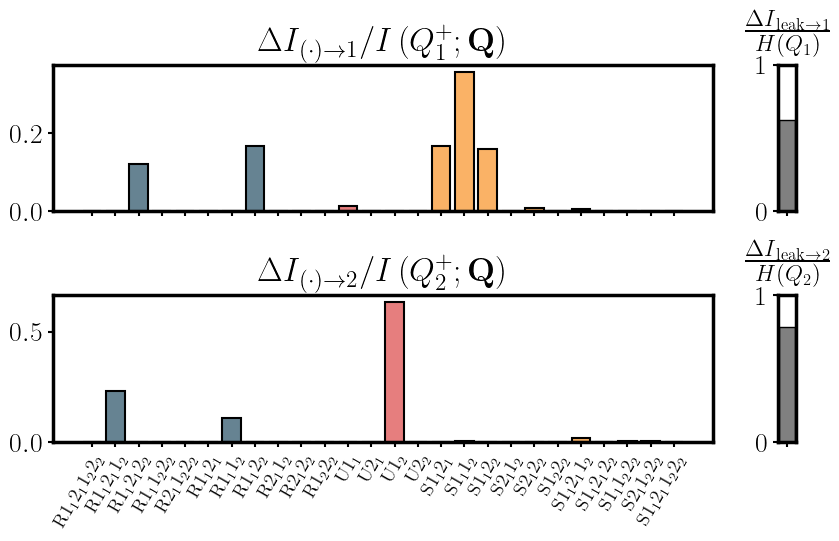

In [20]:
fig, axs = plt.subplots(nvars, 2, figsize=(10, 2.8*nvars), gridspec_kw={'width_ratios': [55, 1]})
I_R, I_S, MI, info_leak = surd.run_multiple_lags(X, nvars, nlag, nbins, max_combs, axs)

plt.tight_layout(w_pad=-4, h_pad=0.5)
plt.show()